# Payoff d'options américaines

Profil payoff & P&L pour un call/put américain (grille payoff identique à l'européenne; prix BS en approximation).

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import sys
from pathlib import Path
from IPython.display import display, Markdown

_base = Path.cwd().resolve()
for extra in (_base, _base.parent, _base.parent.parent, _base.parent.parent.parent):
    for cand in [extra / "scripts", extra / "notebooks" / "scripts"]:
        if cand.exists() and str(cand) not in sys.path:
            sys.path.insert(0, str(cand))
            break
from pricing import fetch_spy_history, payoff_call, payoff_put, view_vanilla_call, view_vanilla_put
plt.style.use("seaborn-v0_8-darkgrid")

close_spy = fetch_spy_history()
spot_ref = float(close_spy.iloc[-1])
strike_ref = spot_ref

D:\PythonDProjects\PaperTradingApp\notebooks\scripts\pricing.py:48: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", period=period, interval=interval, progress=False)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18856\3652948644.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spot_ref = float(close_spy.iloc[-1])


## Historique 1 an du ticker (clôtures SPY)

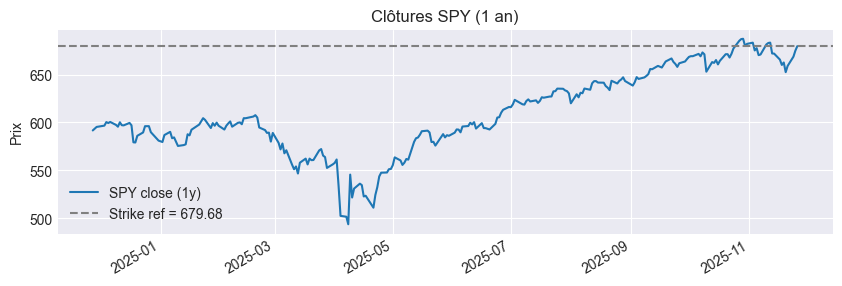

In [5]:

fig_ts, ax_ts = plt.subplots(figsize=(10, 3))
ax_ts.plot(close_spy.index, close_spy.values, label="SPY close (1y)")
ax_ts.axhline(strike_ref, color="gray", linestyle="--", label=f"Strike ref = {strike_ref:.2f}")
ax_ts.set_ylabel("Prix")
ax_ts.set_title("Clôtures SPY (1 an)")
ax_ts.legend(loc="best")
fig_ts.autofmt_xdate()
plt.show()


## Payoff interactif

In [6]:
call_put_widget = widgets.Dropdown(options=["call", "put"], value="call", description="Type")
strike_widget = widgets.FloatSlider(value=strike_ref, min=0.6*spot_ref, max=1.4*spot_ref, step=0.5, description="Strike")
sigma_widget = widgets.FloatSlider(value=0.2, min=0.05, max=1.0, step=0.05, description="Sigma")
r_widget = widgets.FloatSlider(value=0.02, min=-0.05, max=0.1, step=0.005, description="r")
T_widget = widgets.FloatSlider(value=0.5, min=0.05, max=2.0, step=0.05, description="T (années)")

def plot_payoff(call_put, strike, sigma, r, T):
    if call_put == "call":
        view = view_vanilla_call(spot_ref, strike, sigma=sigma, r=r, T=T)
    else:
        view = view_vanilla_put(spot_ref, strike, sigma=sigma, r=r, T=T)
    s_grid = view["s_grid"]
    payoff_grid = view["payoff"]
    pnl_grid = view["pnl"]
    premium = float(view.get("premium", 0.0))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(s_grid, payoff_grid, label="Payoff")
    ax.plot(s_grid, pnl_grid, label="P&L net", color="darkorange")
    ax.axvline(strike, color="gray", linestyle="--", label=f"K = {strike:.2f}")
    ax.axvline(spot_ref, color="crimson", linestyle="-.", label=f"S0 = {spot_ref:.2f}")
    ax.axhline(0, color="black", linewidth=0.8)
    ax.set_xlabel("Spot à maturité")
    ax.set_ylabel("Payoff / P&L")
    ax.set_title(f"{call_put.capitalize()} — prime BS ≈ {premium:.4f}")
    ax.legend(loc="best")
    plt.show()
    display(Markdown(f"**Prime (BS)** : {premium:.4f}"))

ui = widgets.interactive(plot_payoff, call_put=call_put_widget, strike=strike_widget, sigma=sigma_widget, r=r_widget, T=T_widget)
display(ui)

interactive(children=(Dropdown(description='Type', options=('call', 'put'), value='call'), FloatSlider(value=6…